In [45]:
import pandas as pd

path = r"/Users/moazam_a12/Learning Curve/Academia/UET/Semester 6/Introduction to Data Sceince/Project/Datasets/Raisin_Dataset (D-1)/Raisin_Dataset.xlsx"

# Loading Raisin dataset
df_raisin = pd.read_excel(path)

# Preview the data
df_raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [21]:
# Basic info

df_raisin.info()

# Check for missing values
df_raisin.isnull().sum()

# See unique classes
df_raisin['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Class
Kecimen    450
Besni      450
Name: count, dtype: int64

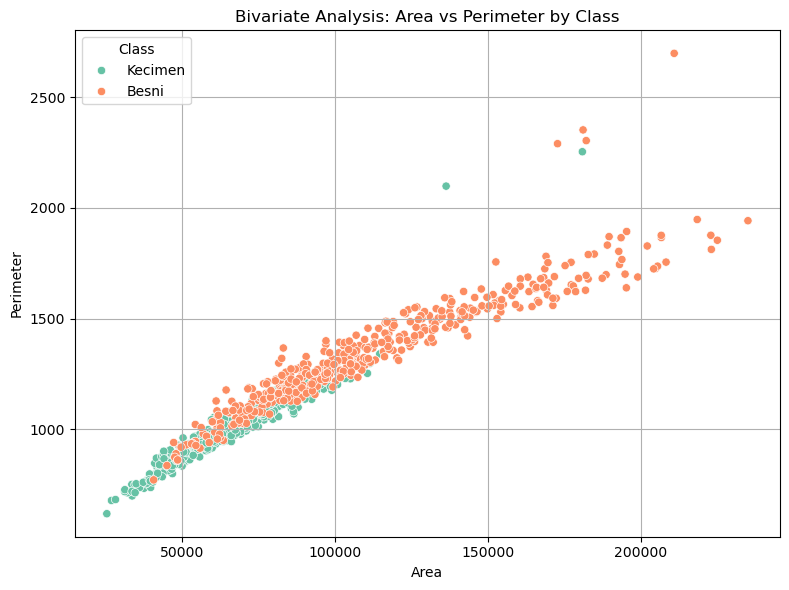

In [25]:
# Bivariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Plot Area vs. Perimeter colored by Class
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_raisin, x='Area', y='Perimeter', hue='Class', palette='Set2')
plt.title('Bivariate Analysis: Area vs Perimeter by Class')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
import sys
sys.path.append('/Users/moazam_a12/Learning Curve/Academia/UET/Semester 6/Introduction to Data Sceince/Project')
from Models.knn_model import train_knn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocessing
X = df_raisin.drop('Class', axis=1)
y = LabelEncoder().fit_transform(df_raisin['Class'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN
accuracy, confusion = train_knn(X_train, y_train, X_test, y_test, n_neighbors=3)

print("KNN Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

KNN Accuracy: 0.8222222222222222
Confusion Matrix:
 [[71 15]
 [17 77]]


In [41]:
features = df_raisin.columns[:-1]  # All features except 'Class'

results = []

for i in range(2, len(features) + 1):
    selected_features = features[:i]
    
    X = df_raisin[selected_features]
    y = LabelEncoder().fit_transform(df_raisin['Class'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    acc, cm = train_knn(X_train, y_train, X_test, y_test, n_neighbors=3)
    
    results.append({
        'num_features': i,
        'features_used': list(selected_features),
        'accuracy': acc,
        'confusion_matrix': cm
    })

In [43]:
for r in results:
    print(f"Using {r['num_features']} features: {r['features_used']}")
    print(f"Accuracy: {r['accuracy']:.4f}")
    print("Confusion Matrix:\n", r['confusion_matrix'])
    print("-" * 40)

Using 2 features: ['Area', 'MajorAxisLength']
Accuracy: 0.8000
Confusion Matrix:
 [[68 18]
 [18 76]]
----------------------------------------
Using 3 features: ['Area', 'MajorAxisLength', 'MinorAxisLength']
Accuracy: 0.8000
Confusion Matrix:
 [[68 18]
 [18 76]]
----------------------------------------
Using 4 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity']
Accuracy: 0.8000
Confusion Matrix:
 [[68 18]
 [18 76]]
----------------------------------------
Using 5 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea']
Accuracy: 0.8222
Confusion Matrix:
 [[71 15]
 [17 77]]
----------------------------------------
Using 6 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']
Accuracy: 0.8222
Confusion Matrix:
 [[71 15]
 [17 77]]
----------------------------------------
Using 7 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
Accuracy: 

In [51]:
from Models.naive_bayes_model import train_naive_bayes

nb_results = []

for i in range(2, len(features) + 1):
    selected_features = features[:i]
    
    X = df_raisin[selected_features]
    y = LabelEncoder().fit_transform(df_raisin['Class'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    acc, cm = train_naive_bayes(X_train, y_train, X_test, y_test)
    
    nb_results.append({
        'num_features': i,
        'features_used': list(selected_features),
        'accuracy': acc,
        'confusion_matrix': cm
    })

In [53]:
for r in nb_results:
    print(f"Using {r['num_features']} features: {r['features_used']}")
    print(f"Accuracy: {r['accuracy']:.4f}")
    print("Confusion Matrix:\n", r['confusion_matrix'])
    print("-" * 40)

Using 2 features: ['Area', 'MajorAxisLength']
Accuracy: 0.8500
Confusion Matrix:
 [[67 19]
 [ 8 86]]
----------------------------------------
Using 3 features: ['Area', 'MajorAxisLength', 'MinorAxisLength']
Accuracy: 0.8222
Confusion Matrix:
 [[63 23]
 [ 9 85]]
----------------------------------------
Using 4 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity']
Accuracy: 0.8222
Confusion Matrix:
 [[63 23]
 [ 9 85]]
----------------------------------------
Using 5 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea']
Accuracy: 0.8278
Confusion Matrix:
 [[63 23]
 [ 8 86]]
----------------------------------------
Using 6 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']
Accuracy: 0.8278
Confusion Matrix:
 [[63 23]
 [ 8 86]]
----------------------------------------
Using 7 features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
Accuracy: 

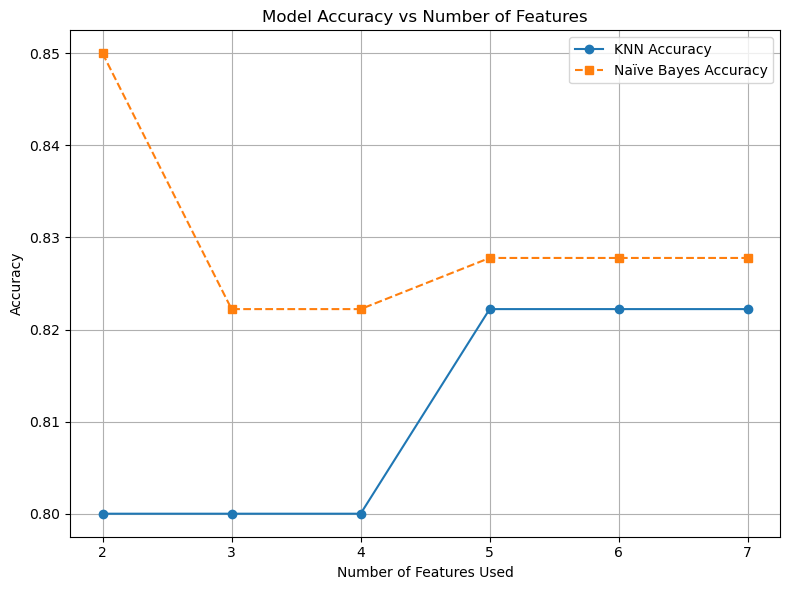

In [55]:
# Extract accuracies
knn_accuracies = [r['accuracy'] for r in results]
nb_accuracies = [r['accuracy'] for r in nb_results]
feature_counts = [r['num_features'] for r in results]

# Plotting
plt.figure(figsize=(8,6))
plt.plot(feature_counts, knn_accuracies, marker='o', label='KNN Accuracy')
plt.plot(feature_counts, nb_accuracies, marker='s', label='Naïve Bayes Accuracy', linestyle='--')
plt.title('Model Accuracy vs Number of Features')
plt.xlabel('Number of Features Used')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()